# Simple Linear Regression Model
# Independent Variable i.e. Yrs of Exp
# Dependednt Variable i.e. Salary
# Predict the Salary based on Exp data feeded.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
salaryDf = pd.read_csv('salary.csv')
salaryDf.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


<Axes: >

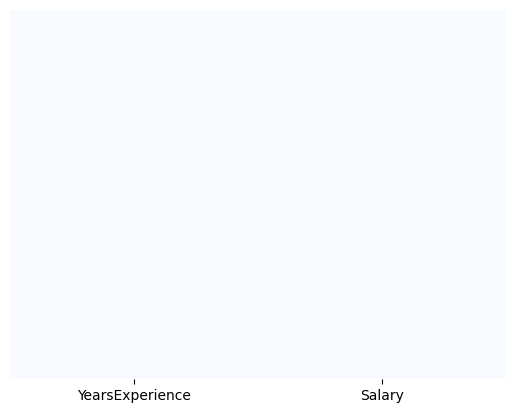

In [7]:
# EDA:
# Lets check if your df has null values or not?

sb.heatmap(salaryDf.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [13]:
# min & max sal
salaryDf[salaryDf['Salary'] == salaryDf['Salary'].max()]

,YearsExperience,Salary
34,13.5,139465


In [14]:
salaryDf[salaryDf['Salary'] == salaryDf['Salary'].min()]

,YearsExperience,Salary
2,1.5,37731


array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

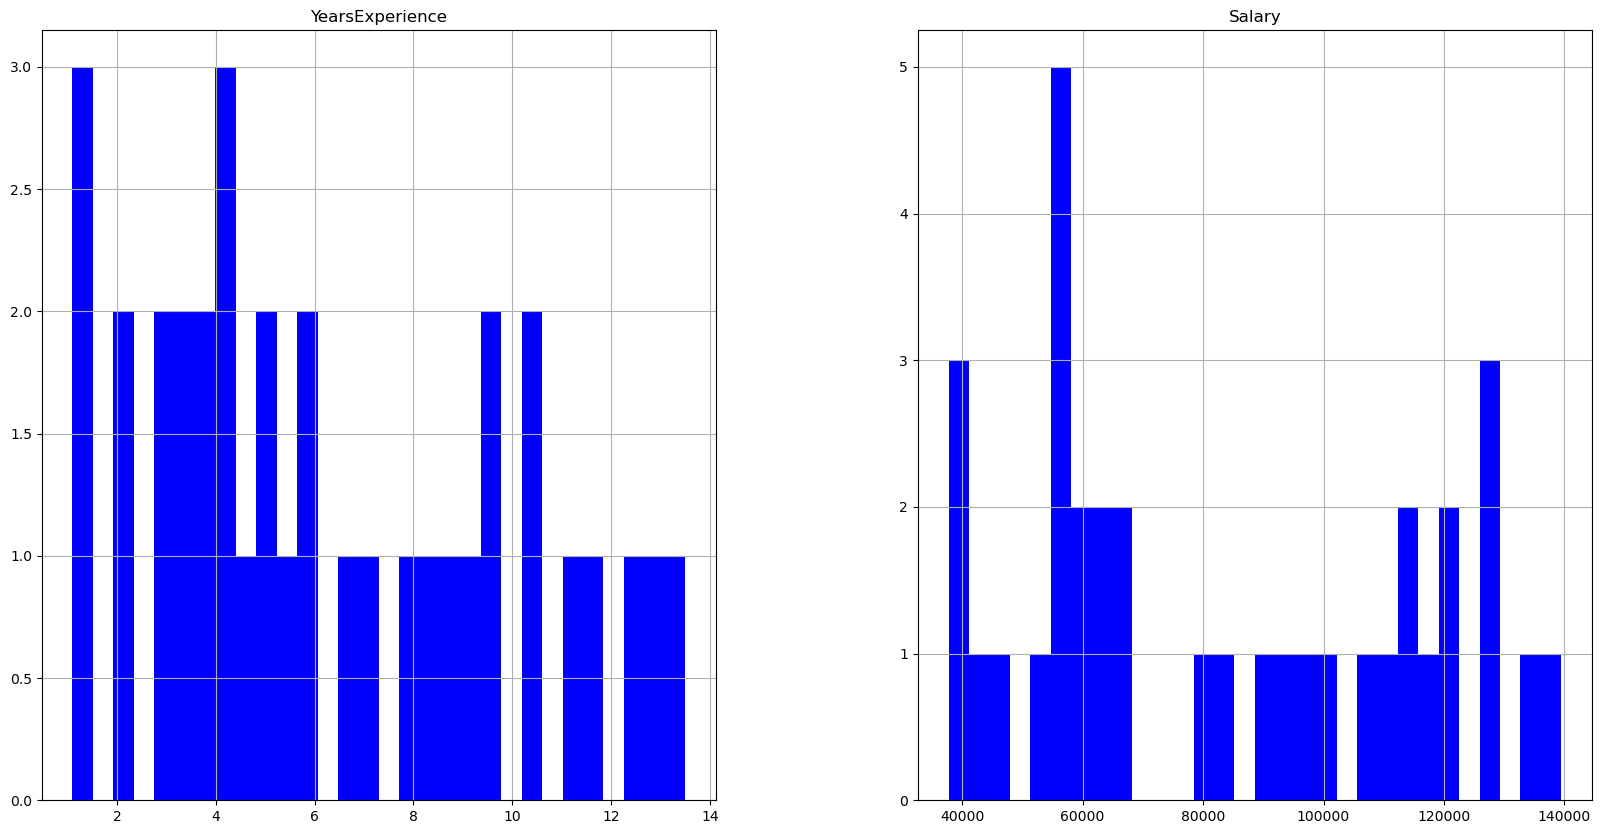

In [18]:
salaryDf.hist(bins = 30, figsize=(20,10), color='b')

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


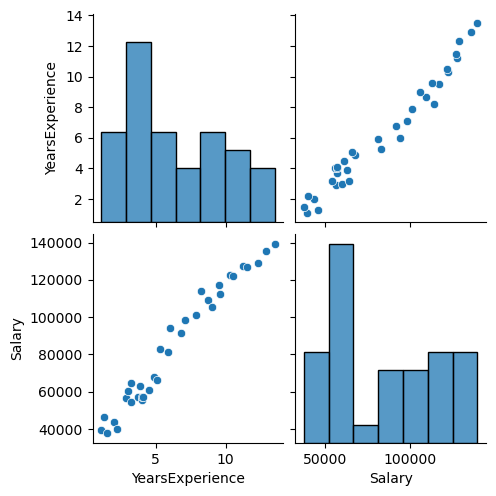

In [19]:
sb.pairplot(salaryDf)

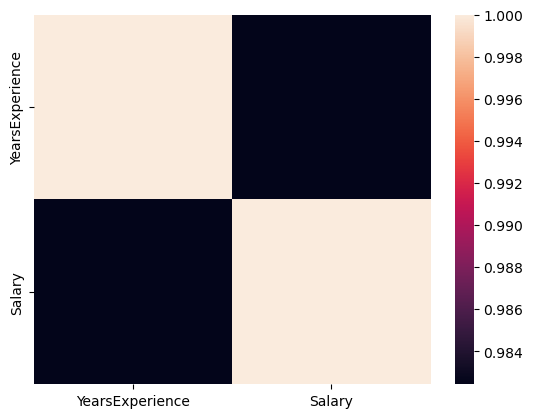

In [25]:
sb.heatmap(salaryDf.corr())
plt.show()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

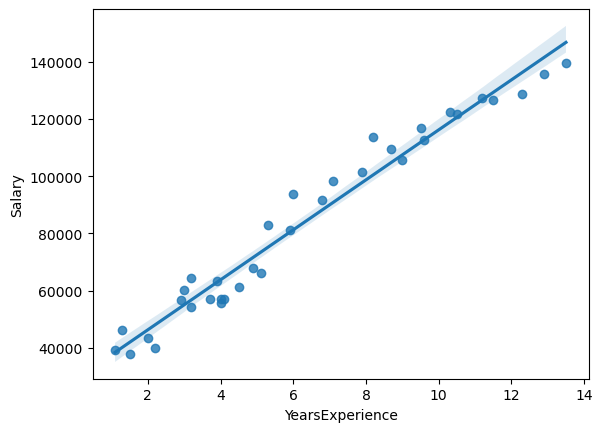

In [28]:
# regplot to obtain a straigt line between salary & yr of exp
sb.regplot(x = 'YearsExperience', y = 'Salary', data = salaryDf)

In [29]:
# Training & Testing Datasets.
salaryDf.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [35]:
X = salaryDf[['YearsExperience']]
y = salaryDf[['Salary']]

In [37]:
X.shape

(35, 1)

In [38]:
y.shape

(35, 1)

In [39]:
X = np.array(X).astype('float32')

In [40]:
y = np.array(y).astype('float32')

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [44]:
# Train a linear Regression Model:
from sklearn.linear_model import LinearRegression

In [45]:
regML = LinearRegression(fit_intercept=True)
regML.fit(X_train, y_train)

LinearRegression()

In [47]:
regML.score(X_test, y_test)

0.9577848419028979

In [48]:
pred = regML.predict(X_test)
pred

array([[ 80660.98 ],
       [ 49250.555],
       [ 68775.95 ],
       [ 90848.14 ],
       [118013.91 ],
       [ 43308.043],
       [ 97639.58 ]], dtype=float32)

Text(0.5, 1.0, 'Sal Vs Yrs of Exp')

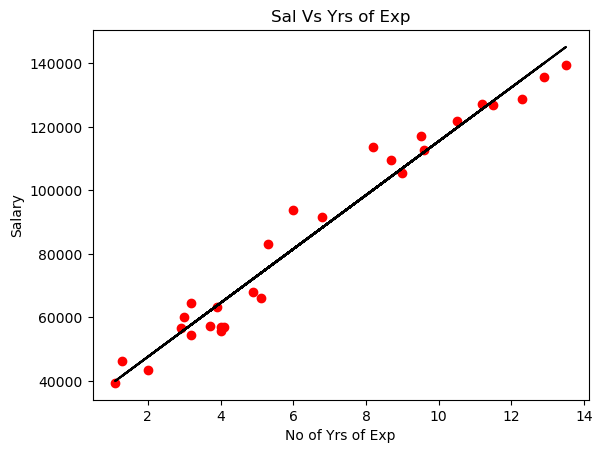

In [53]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regML.predict(X_train), color='black')
plt.ylabel('Salary')
plt.xlabel('No of Yrs of Exp')
plt.title('Sal Vs Yrs of Exp')

In [62]:
no_exp = [[11]]
salaryPred = regML.predict(no_exp)
salaryPred

array([[123956.41992188]])